# DBSCAN

## 1. Exploración y preprocesamiento de datos:

Cargamos los datos

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds_path = "data/Wholesale customers data.csv"
df = pd.read_csv(ds_path)


Visualizamos la cabecera

In [155]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


Exploramos los datos

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Observamos los valores unicos de las variables categóricas

In [157]:
from utils.eda import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

Continuamos con la exploración de los datos

Visualizamos las últimas entradas

In [158]:
df.tail(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
430,1,3,3097,4230,16483,575,241,2080
431,1,3,8533,5506,5160,13486,1377,1498
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


Verificamos los valores descriptivos

In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


Continuamos con el analisis

### Identificación de valores nulos, duplicados y outliers

In [160]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


Ahora buscamos valores nulos

In [161]:
from utils.eda import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
Channel,440,0,0.0
Region,440,0,0.0
Fresh,440,0,0.0
Milk,440,0,0.0
Grocery,440,0,0.0
Frozen,440,0,0.0
Detergents_Paper,440,0,0.0
Delicassen,440,0,0.0


Se observan valores Nulos en las columnas Minimun Payments y Credit Limit

In [162]:
df.dropna(inplace=True)

Eliminamos los valores nulos ya que representan una proporcion pequenha del dataset

Generamos Histogramas para visualizar la distribucion

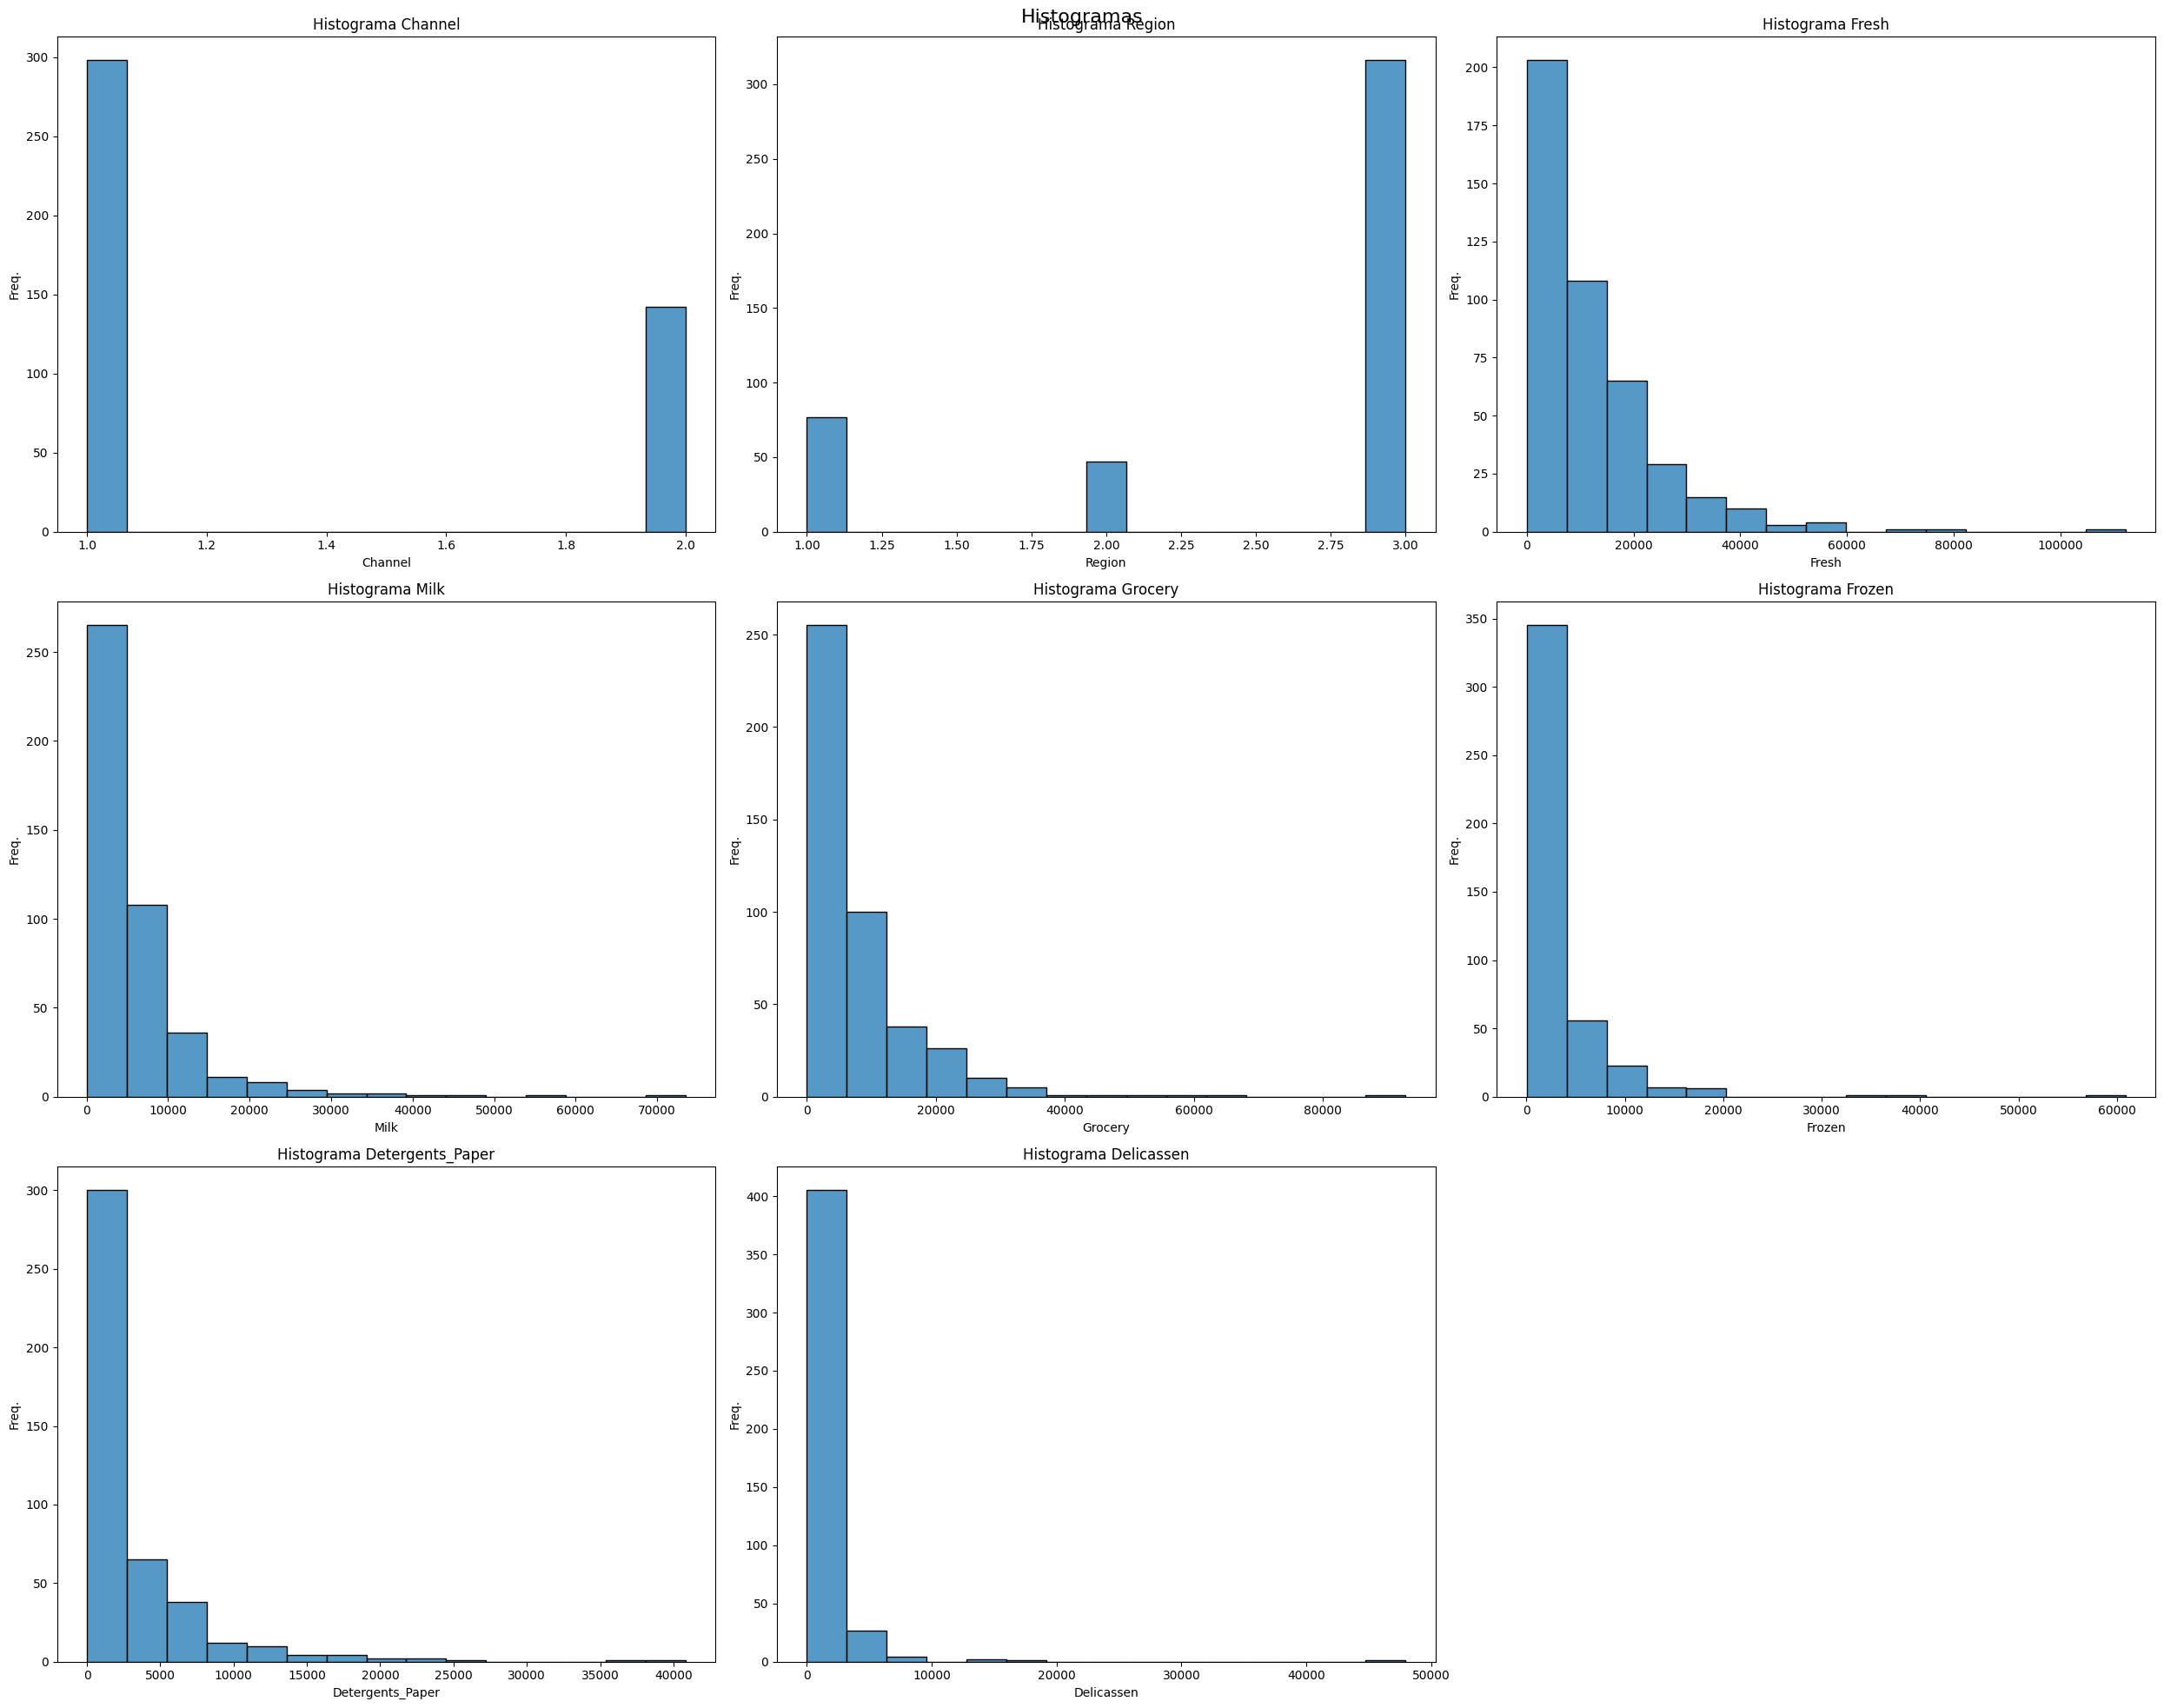

In [163]:
from utils.eda import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), bins=15, columns_number=3, figsize=(25, 20))


No se observa nada fuera de lo normal en los histogramas

Ahora verificamos los outliers

In [164]:
from utils.eda import get_outliers_data
get_outliers_data(df)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
N° Outliers,0.0,0.0,20.000000,28.000000,24.000000,43.000000,30.000000,27.000000
% Outliers,0.0,0.0,4.545455,6.363636,5.454545,9.772727,6.818182,6.136364
Lim. mix,-0.5,0.5,-17581.250000,-6952.875000,-10601.125000,-3475.750000,-5241.125000,-1709.750000
Lim. max,3.5,4.5,37642.750000,15676.125000,23409.875000,7772.250000,9419.875000,3938.250000


Visualizamos las gráficas de cajas de nuestras columnas

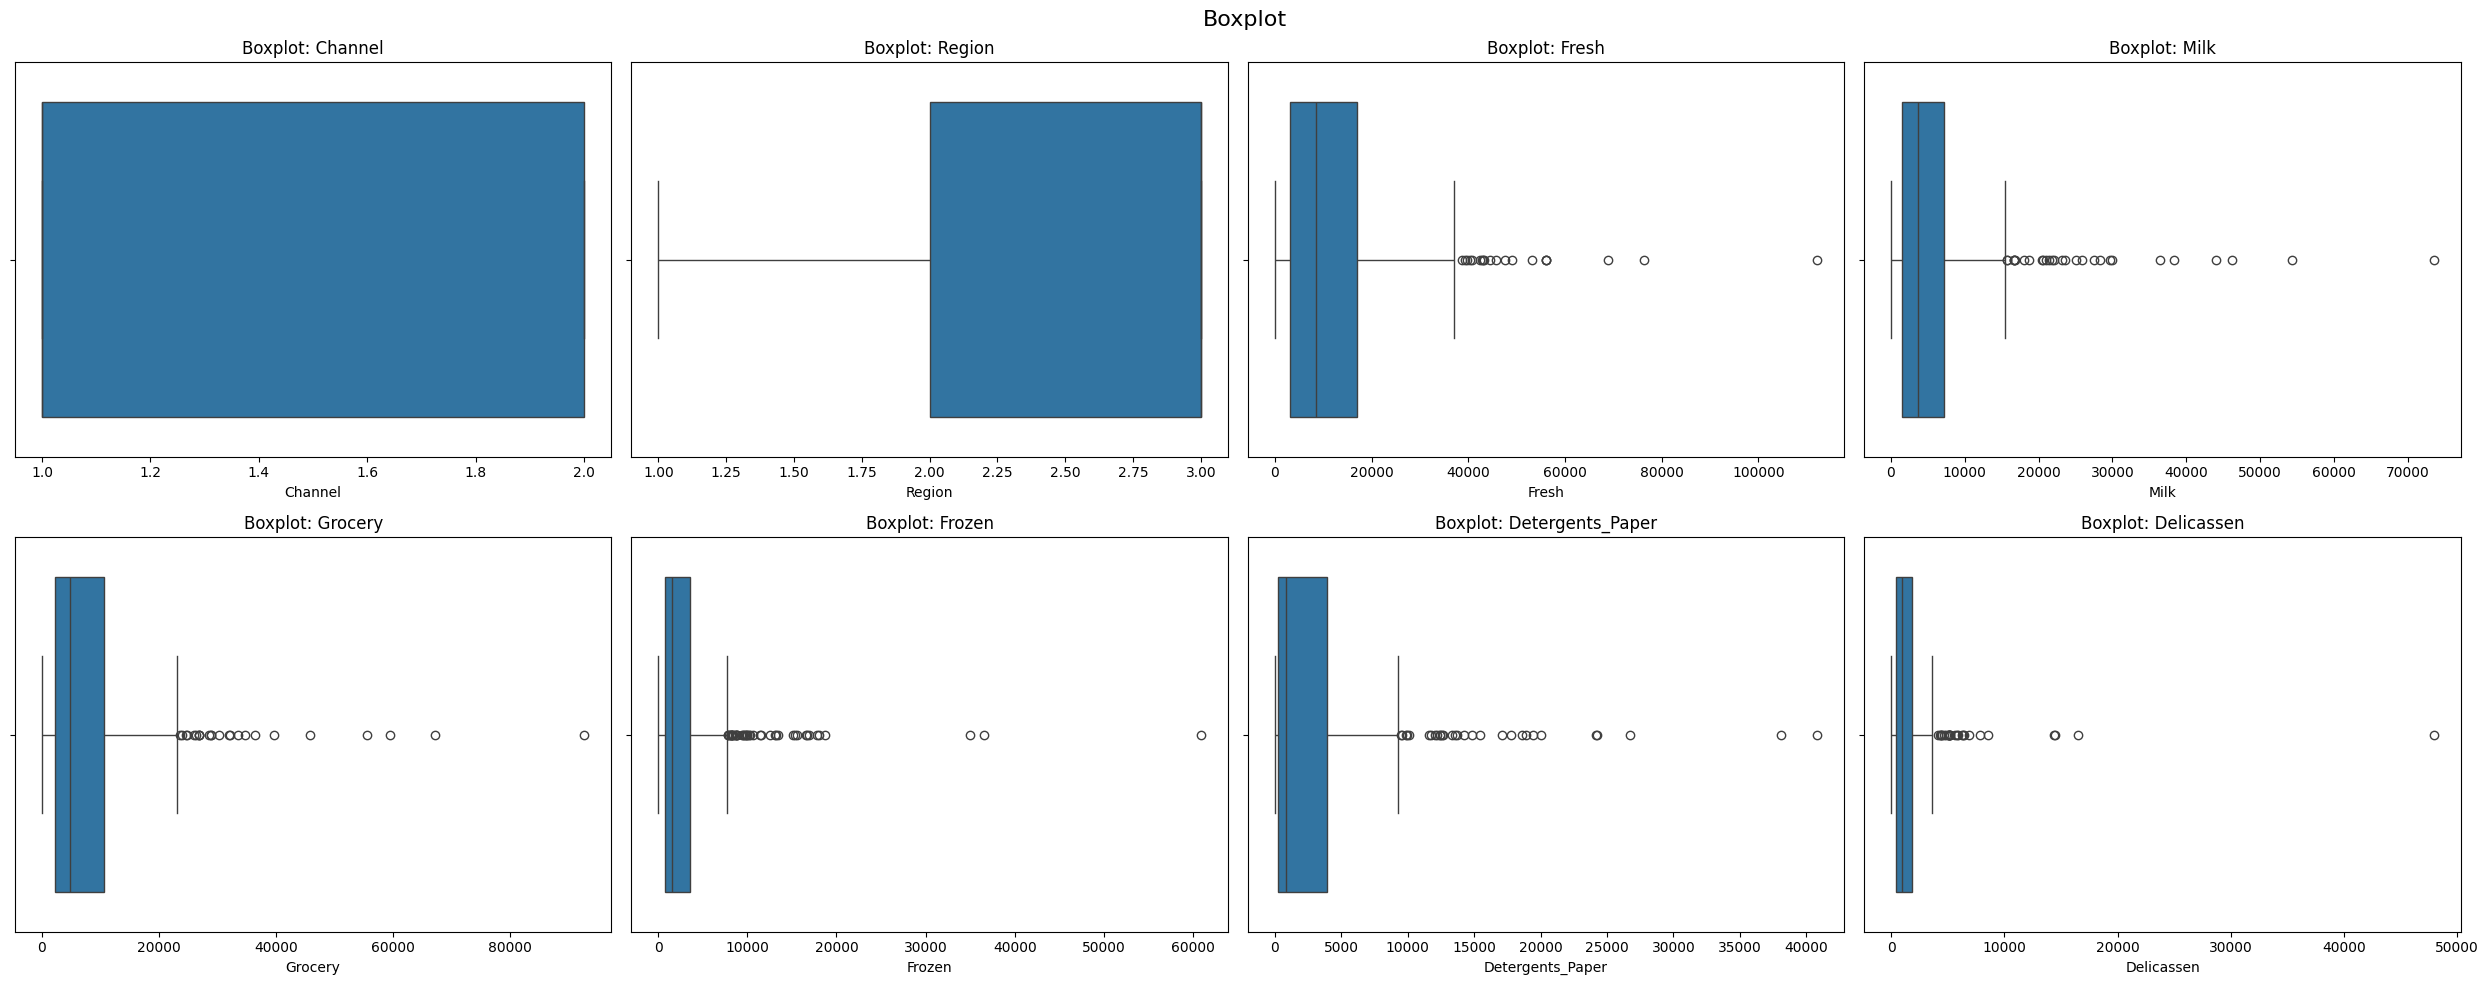

In [165]:
from utils.eda import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df), figsize=(25, 10), num_columns=4)

Observamos varios outliers

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [166]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [167]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
median,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
variation_coefficient,0.353853,0.304450,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


Veremos las correlaciones entre las caracteristicas

In [168]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [169]:
df.info()
df.drop(columns=['Channel','Region'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Ahora graficamos el mapa de calor de las correlaciones

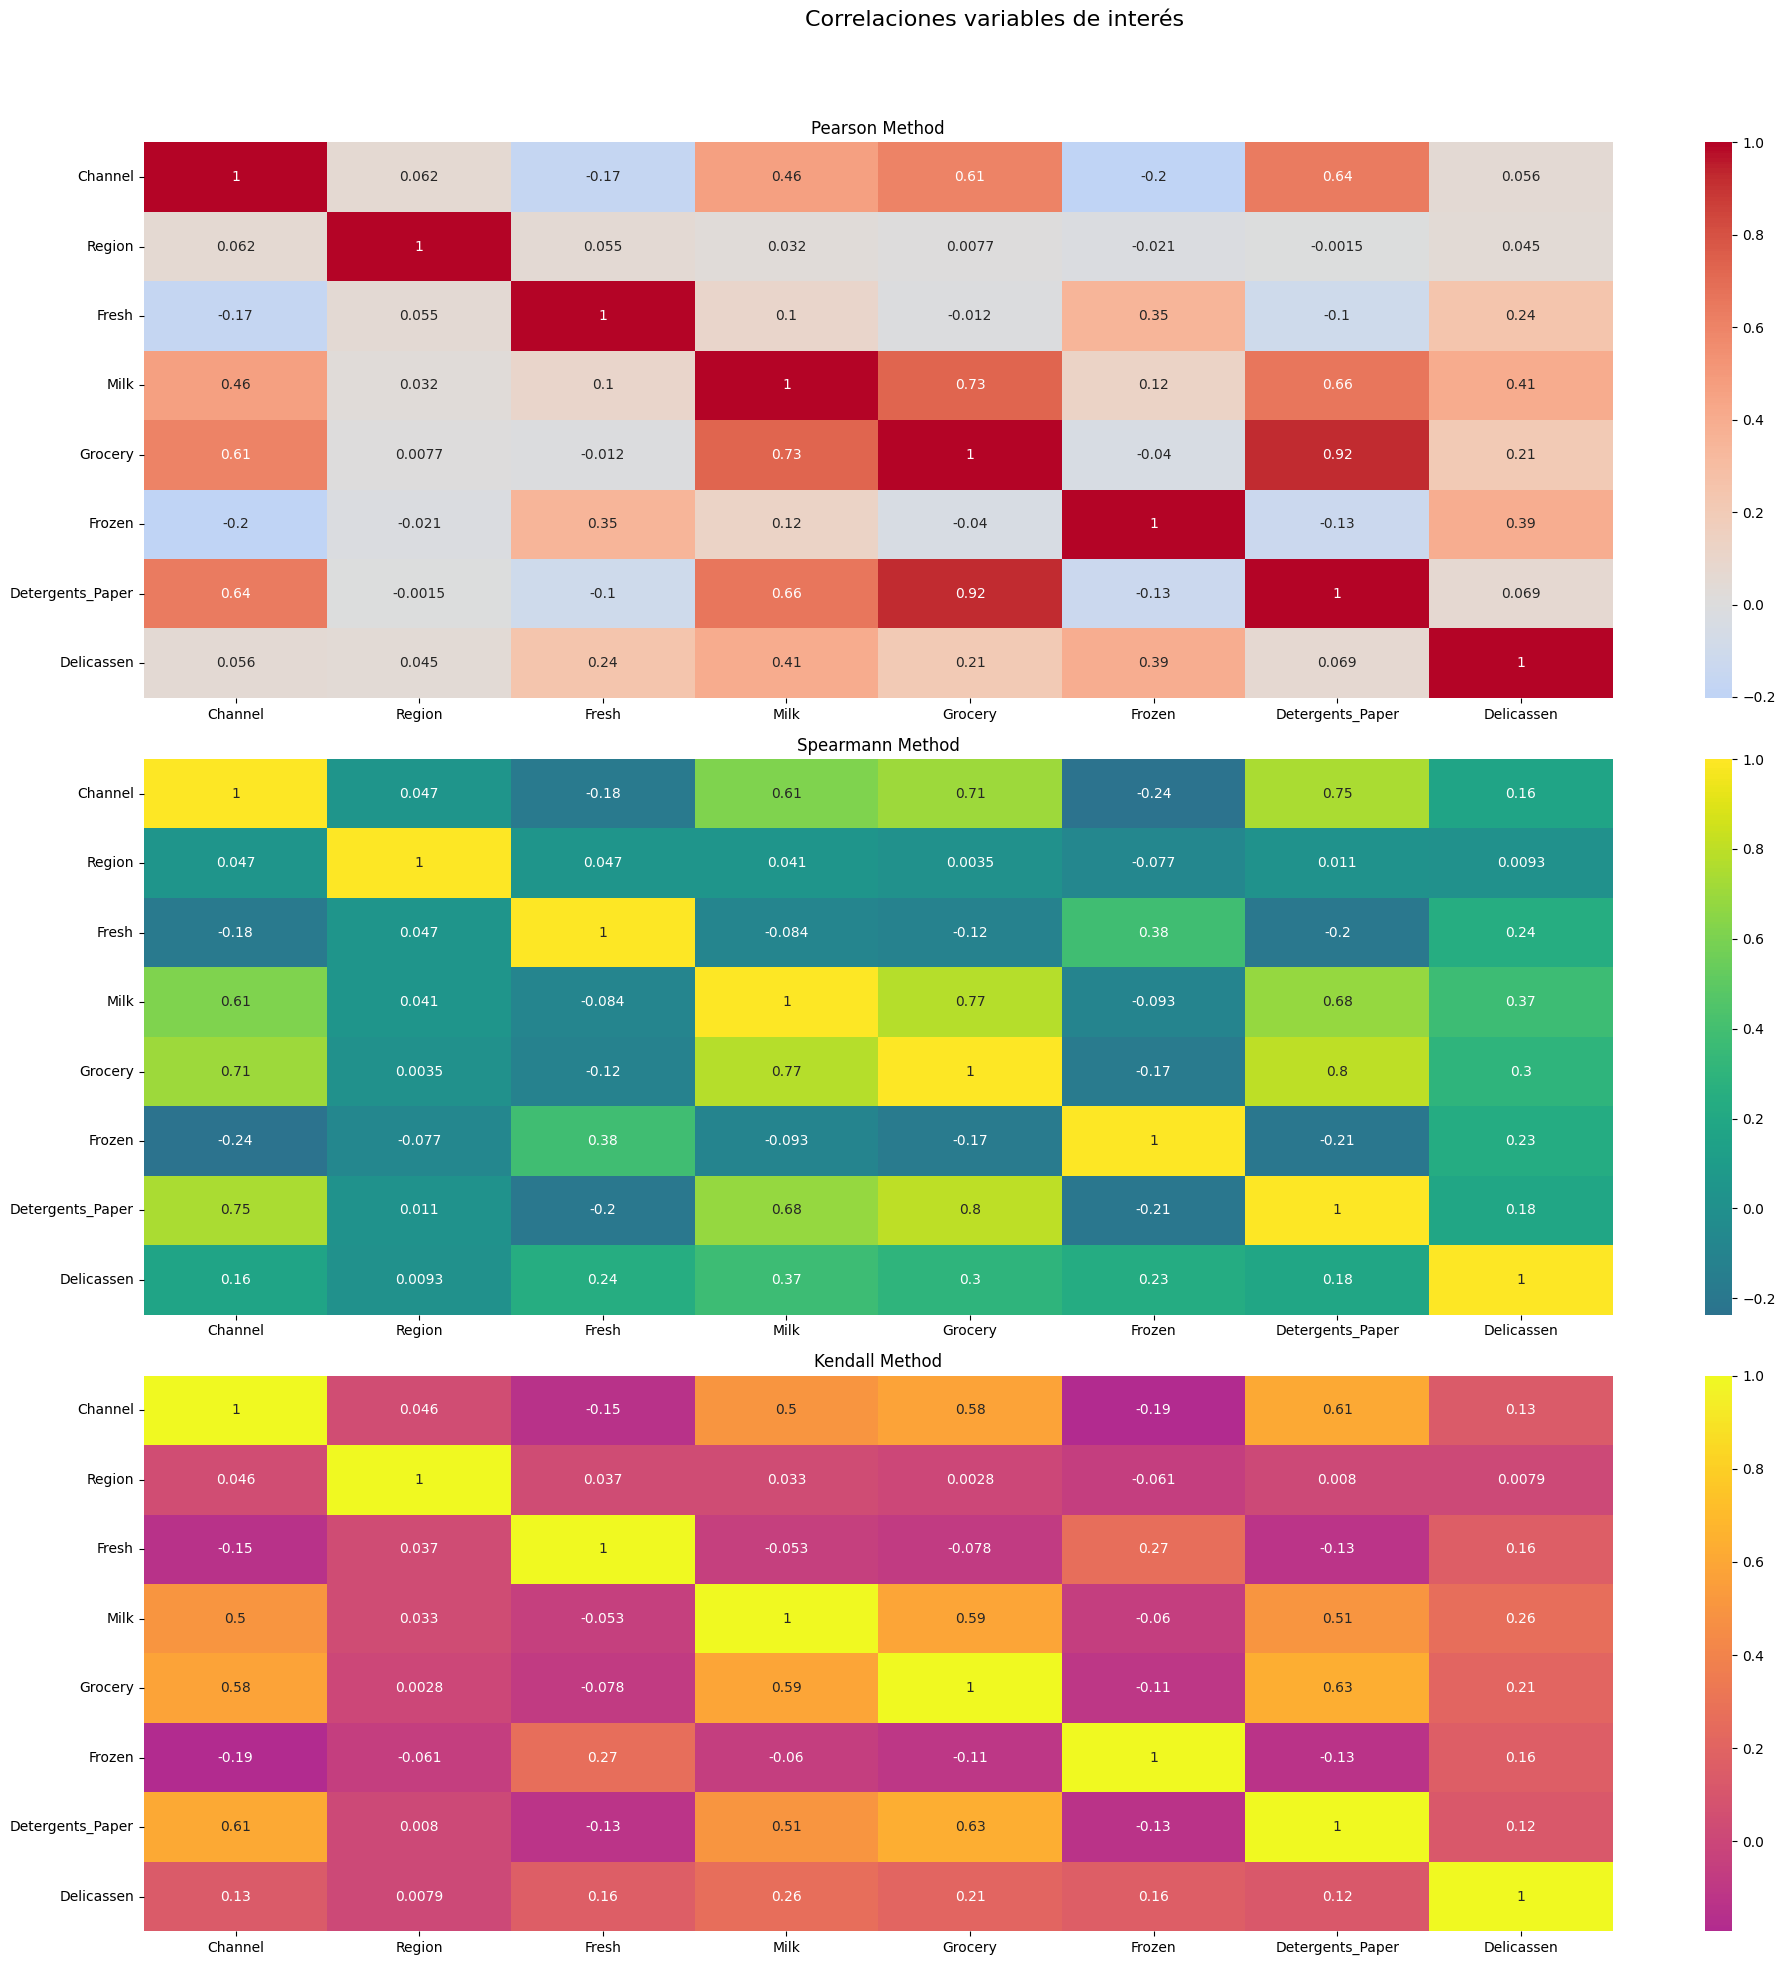

In [170]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,20),num_columns=1)

Estandarizamos las variables

In [171]:
numeric_columns = get_numeric_columns(df)

X = df[numeric_columns]

df_scaled = df.copy()

for column in numeric_columns:
    mean = df_scaled[column].mean()
    std_dev = df_scaled[column].std()

    z_scores = (df_scaled[column] - mean) / std_dev
    df_scaled[column] = z_scores

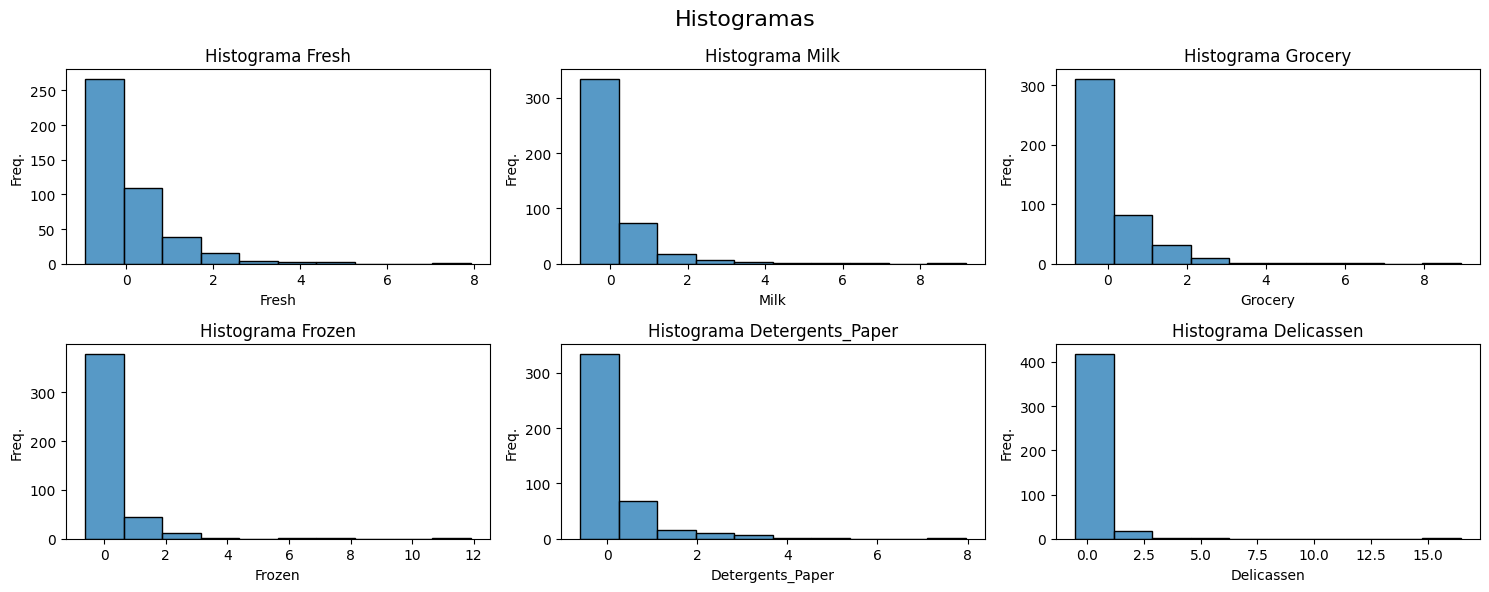

In [172]:
columnas_numericas = get_numeric_columns(df_scaled)

graph_histogram(df_scaled, columnas_numericas, bins=10, figsize=(15, 6))

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(X_scaled, columns=scaler.get_feature_names_out())

Importamos librerias

In [184]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [185]:
columns = df_scaled.columns.tolist()
columns.remove("Delicassen")
X = df_scaled[columns].values

Graficamos k-neighbours para estimar eps

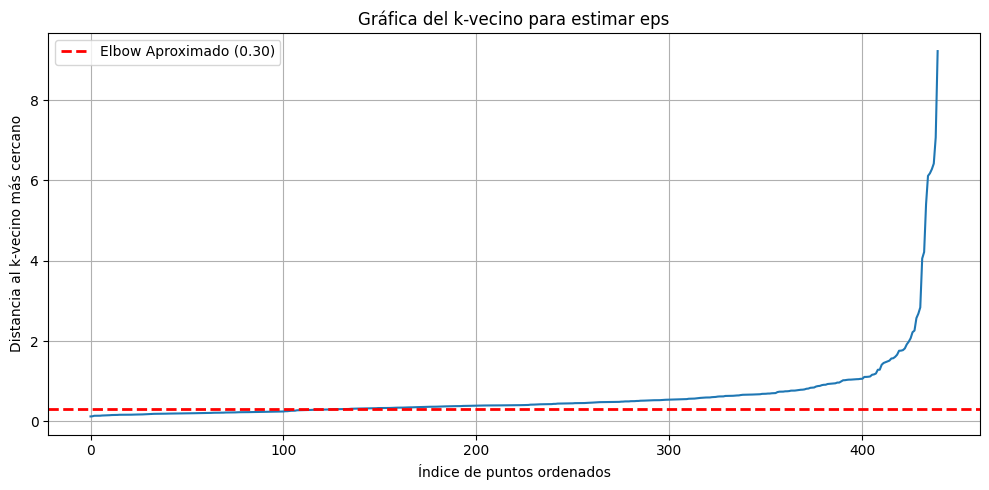

In [176]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances[:, -1])
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('Gráfica del k-vecino para estimar eps')
plt.xlabel('Índice de puntos ordenados')
plt.ylabel('Distancia al k-vecino más cercano')
elbow = 0.3
plt.axhline(
    elbow,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Elbow Aproximado ({elbow:.2f})"
)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Probamos con diferentes valores de epsilon y min_samples

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {
    'eps': np.arange(0.1, 2.0, 0.1),
    'min_samples': range(3, 20, 1)
}
grid = ParameterGrid(param_grid)
best_params = None
best_score = -1
results = []
for params in grid:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    clusters = dbscan.fit_predict(X)
    if (len(set(clusters)) > 1 and -1 not in clusters) or (len(set(clusters)) > 2 and -1 in clusters):
        score = silhouette_score(X, clusters)
        results.append((params['eps'], params['min_samples'], score))
        print(f"Score for params {str(params)}: {score}")
        if score > best_score:
            best_score = score
            best_params = params
results = np.array(results)
print(f"Mejores parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

Score for params {'eps': np.float64(0.1), 'min_samples': 3}: -0.31893523133409446
Score for params {'eps': np.float64(0.1), 'min_samples': 4}: -0.30078096254545367
Score for params {'eps': np.float64(0.2), 'min_samples': 3}: -0.28690333977271315
Score for params {'eps': np.float64(0.2), 'min_samples': 4}: -0.24635257790656864
Score for params {'eps': np.float64(0.2), 'min_samples': 5}: -0.2589485982116294
Score for params {'eps': np.float64(0.2), 'min_samples': 6}: -0.2910686080699152
Score for params {'eps': np.float64(0.2), 'min_samples': 7}: -0.29652175386080687
Score for params {'eps': np.float64(0.2), 'min_samples': 8}: -0.22887221149806114
Score for params {'eps': np.float64(0.2), 'min_samples': 9}: -0.23531785055304325
Score for params {'eps': np.float64(0.2), 'min_samples': 10}: -0.23753676004126867
Score for params {'eps': np.float64(0.2), 'min_samples': 11}: -0.25533976497709937
Score for params {'eps': np.float64(0.30000000000000004), 'min_samples': 3}: -0.2738002428888887
S

Visualizamos el Score

In [178]:
dbscan = DBSCAN(eps=1.4, min_samples=3)
dbscan.fit(X)


y_pred = dbscan.fit_predict(X)

score = silhouette_score(X, y_pred)
print(np.unique(dbscan.labels_))
print(score)

y_pred

[-1  0  1]
0.5870448657597562


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [179]:
clusters = np.unique(dbscan.labels_)

Visualizamos los clusters

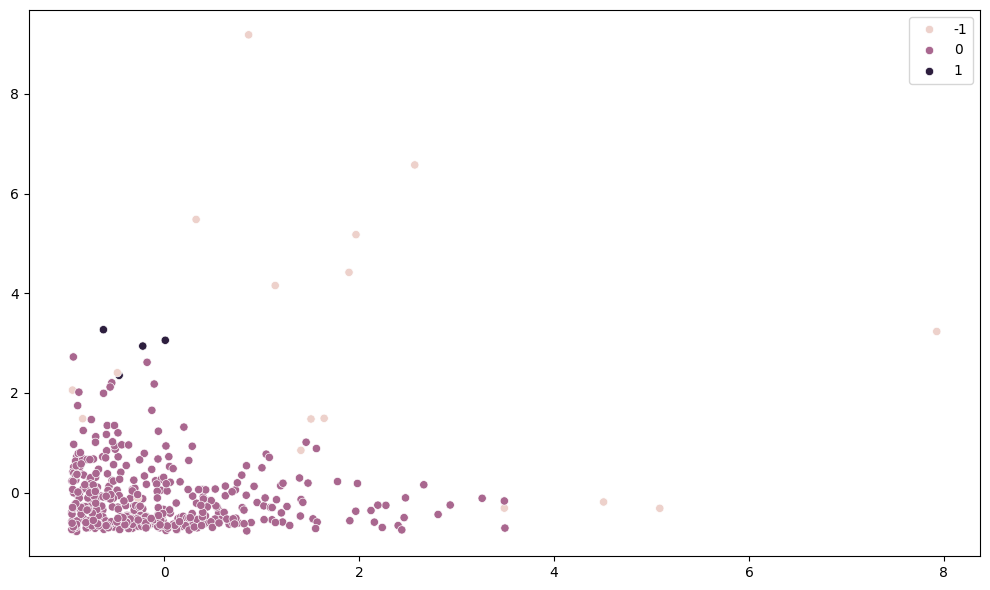

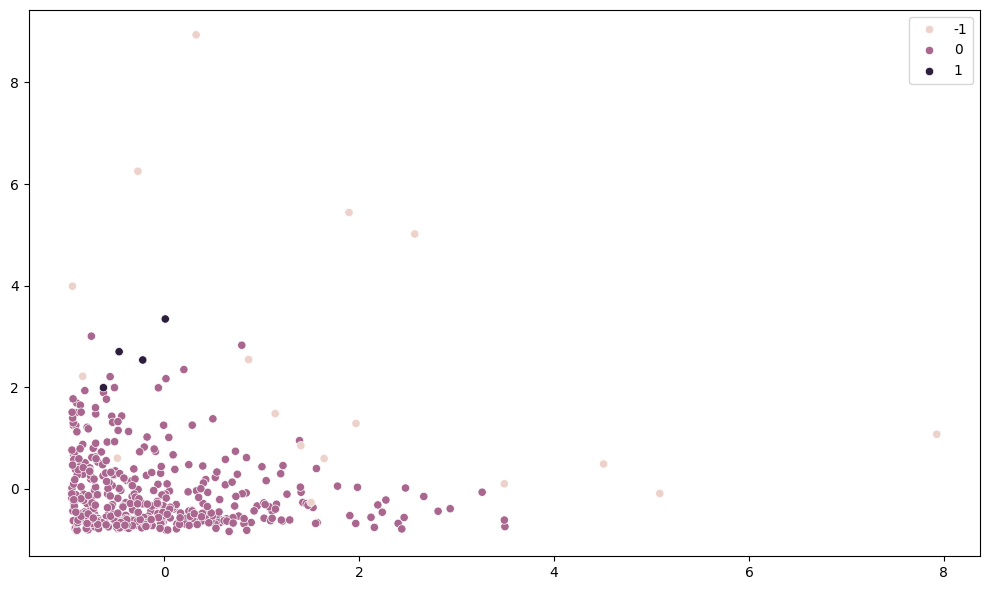

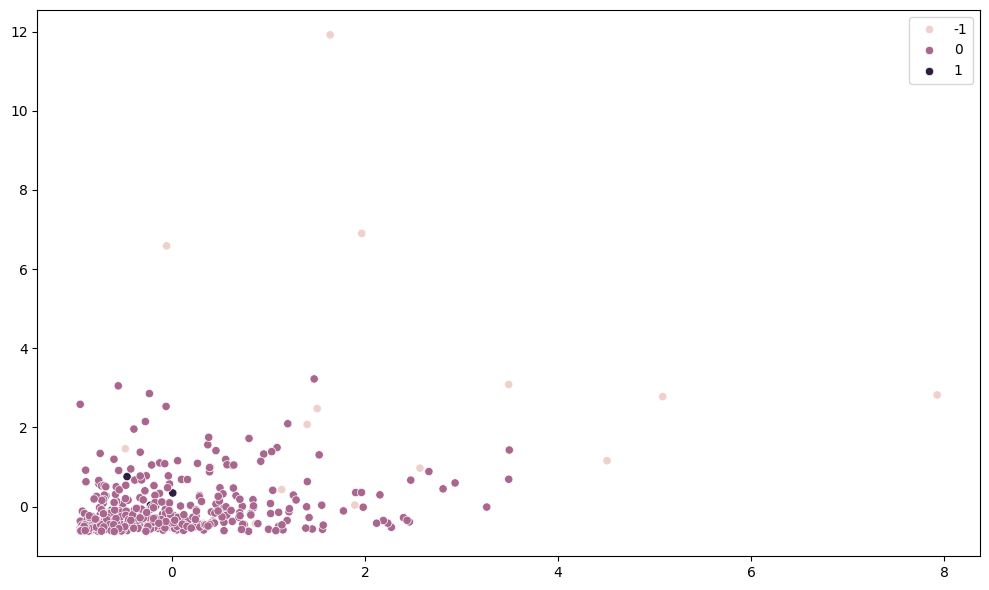

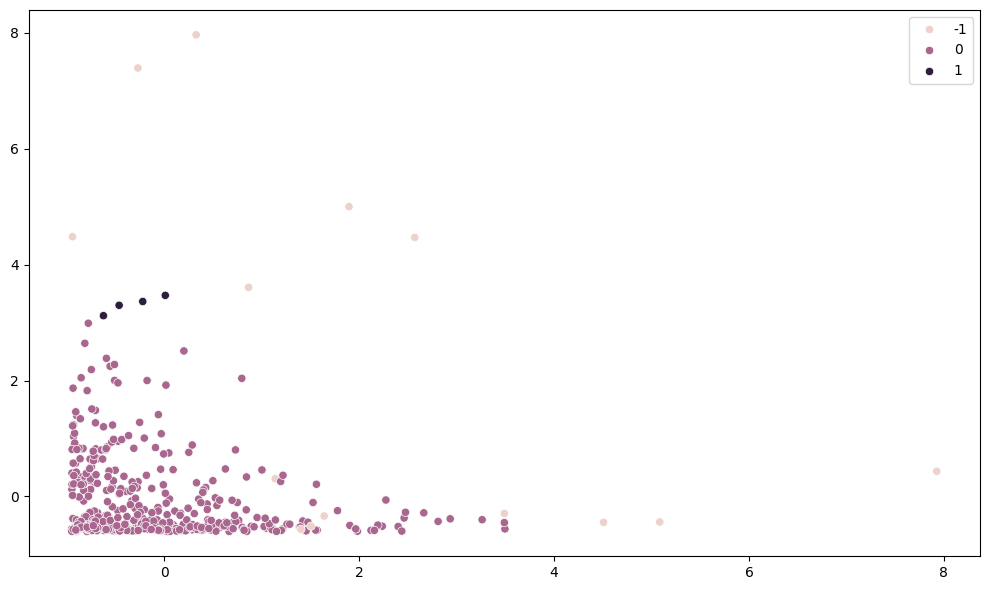

In [180]:
import seaborn as sns

for col_idx in range(1, X.shape[1]):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=X[:,0],y=X[:,col_idx], hue=y_pred)
    plt.tight_layout()
        
    plt.show()

Visualizacion de clusters y outliers

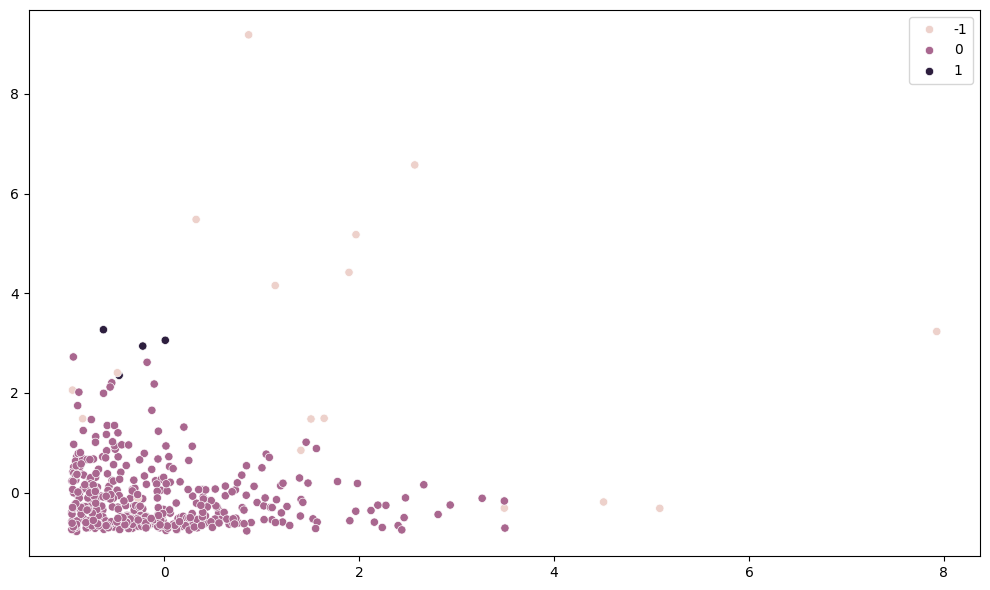

In [183]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y_pred)
plt.tight_layout()
plt.show()

Es presumible que los valores de -1 corresponden a ruido (outliers)

In [181]:
df_conteo = pd.DataFrame(y_pred, columns=["cluster"])

unicos = df_conteo["cluster"].unique()

for unico in unicos:
    conteo = df_conteo[df_conteo["cluster"] == unico].count()
    print(f"Conteo para cluster {unico}: {conteo}")

Conteo para cluster 0: cluster    418
dtype: int64
Conteo para cluster -1: cluster    18
dtype: int64
Conteo para cluster 1: cluster    4
dtype: int64


## Resultados

- Cluster 0: Contiene 418 puntos. Este es el cluster dominante, agrupando la mayoría de los datos. Esto indica que existe una región en el espacio de las variables donde los puntos están más densamente distribuidos y son similares entre sí.
- Cluster 1: Contiene solo 4 puntos. Es un cluster mucho más pequeño, lo que podría indicar la existencia de un grupo aislado de datos que comparten características comunes pero son diferentes del cluster 0.
- Outliers (-1): Hay 18 puntos etiquetados como outliers. Estos puntos no cumplen los criterios de densidad del algoritmo (en este caso, DBSCAN), lo que sugiere que están dispersos o son atípicos.

Correlaciones:

El gráfico muestra cómo los puntos se distribuyen en función de las variables PURCHASES y PURCHASES_FREQUENCY:

- Cluster 0:

La mayoría de los puntos del cluster 0 se encuentran concentrados en regiones de valores bajos de PURCHASES (cantidad de compras) y PURCHASES_FREQUENCY (frecuencia de compras).
Esto sugiere que este cluster agrupa clientes con patrones de compra bajos y regulares.
- Cluster 1:

Este cluster se encuentra en una región específica del espacio, con valores moderados o altos en PURCHASES y PURCHASES_FREQUENCY.
Esto puede representar a clientes con patrones de compra más intensos o frecuentes.

- Outliers (-1):

Los puntos etiquetados como -1 (outliers) están distribuidos en áreas del gráfico donde hay menos densidad de datos, como valores extremos en PURCHASES o PURCHASES_FREQUENCY.
Estos valores atípicos podrían ser clientes con comportamientos de compra poco frecuentes o inconsistentes.

Consideraciones sobre los resultados:

- Dominancia del cluster 0:

La mayor concentración de puntos en el cluster 0 podría deberse a una distribución desigual de las características en los datos.
Esto puede ser útil para identificar el comportamiento típico de los clientes, pero también podría ocultar patrones interesantes en clusters más pequeños.

- Cluster pequeño (1):

Aunque pequeño, el cluster 1 destaca por ser diferente del resto. Podría representar un segmento valioso de clientes con patrones de compra distintos.

- Outliers (-1):

Los outliers pueden ser cruciales si representan clientes con comportamientos únicos (ej., grandes compradores) o errores en los datos.
Es importante analizarlos con más detalle para decidir si deben tratarse como excepciones o integrarse en un modelo de clustering más refinado.
Conclusiones y Recomendaciones:

En resumen
El cluster 0 representa patrones típicos de compra.
El cluster 1 podría ser un segmento único y valioso.
Los outliers son excepciones que podrían requerir análisis adicional.
Correlación entre variables y clusters:

Hay una relación clara entre las variables PURCHASES y PURCHASES_FREQUENCY en los clusters, donde los clientes con más compras o frecuencias altas tienden a formar pequeños grupos o ser clasificados como outliers.
Distribución de outliers:

Los outliers se encuentran en valores extremos, lo que sugiere comportamientos de compra únicos o datos que no encajan bien con el resto.